In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from desert import isnum
from pfunctions import getTimeSteps
from FGMTableV2 import *
from readOFFiles import *
from scipy.interpolate import interp1d
from tableProperties import FGMtableProperties
from lookup import lookup
from oneDCaseReader import oneDCaseReader

Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading HRR_table
Reading SourcePV_table
Reading kappa_table
Reading mu_table
Reading psi_table
Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading Qdot_table
Reading SourcePV_table
Reading kappa_table
Reading mu_table
Reading psi_table
Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading Qdot_table
Reading SourcePV_table
Reading kappa_table
Reading mu_table
Reading psi_table


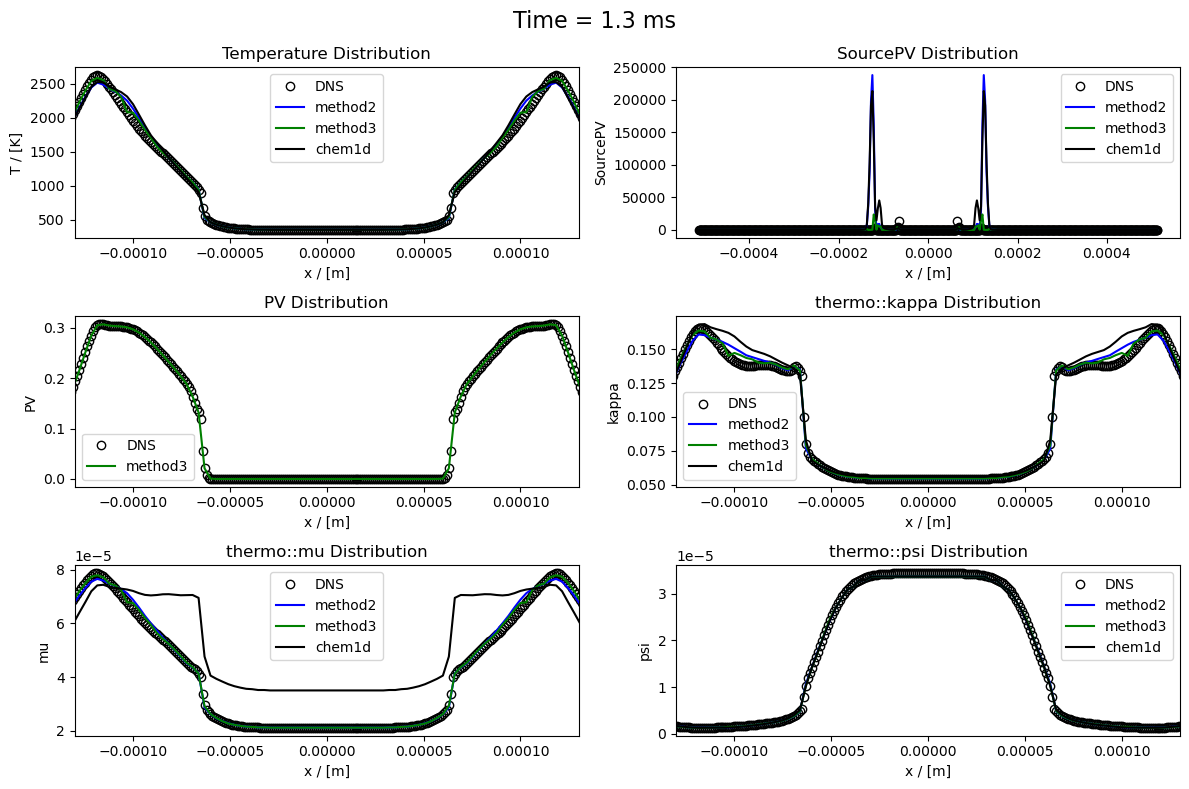

In [2]:
t = 0.0013
DNSCase = oneDCaseReader("../Cases/nhep1d/dnsStandard/")
Zgrid = np.linspace(0,1,301) * np.linspace(0,1,301)
Cgrid = np.linspace(0,1,501)
x_1000 = np.linspace(-0.000512,0.000512,1000)
x_5000 = np.linspace(-0.000512,0.000512,5000)

Z     = DNSCase.readData(t,"Z")
PV    = DNSCase.readData(t,"PV")
C7H16 = DNSCase.readData(t,"C7H16")
T     = DNSCase.readData(t,"T")
RO2   = DNSCase.readData(t,"C7H15O2")
OH    = DNSCase.readData(t,"OH")
#HRR   = DNSCase.readData(t,"Qdot")
NH3   = DNSCase.readData(t, "NH3")
SourcePV = DNSCase.readData(t, "SourcePV")
kappa = DNSCase.readData(t,"thermo:kappa")
mu    = DNSCase.readData(t,"thermo:mu")
psi   = DNSCase.readData(t,"thermo:psi")



c1dLookup = lookup("./table_c1d/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","HRR","SourcePV","kappa","mu","psi"])
m2Lookup = lookup("./table_m2a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot","SourcePV","kappa","mu","psi"])
m3Lookup = lookup("./table_m3a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot","SourcePV","kappa","mu","psi"])



plt.figure(figsize = (12,8))
plt.subplot(321)
# Data points
plt.plot(x_1000, T, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "T")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "T")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "T")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('T / [K]')
plt.xlim([-0.00013, 0.00013])
plt.title('Temperature Distribution')
plt.legend()

plt.subplot(322)
# Data points

plt.plot(x_1000, SourcePV, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "SourcePV")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "SourcePV")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "SourcePV")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('SourcePV')
#plt.xlim([-0.00013, 0.00013])
plt.title('SourcePV Distribution')
plt.legend()

plt.subplot(323)
# Data points
plt.plot(x_1000, PV, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], PV[::3], '-', color='green',markerfacecolor='none', label="method3")


# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('PV')
plt.xlim([-0.00013, 0.00013])
plt.title('PV Distribution')
plt.legend()


plt.subplot(324)
# Data points
plt.plot(x_1000, kappa, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "kappa")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "kappa")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "kappa")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('kappa')
plt.xlim([-0.00013, 0.00013])
plt.title('thermo::kappa Distribution')
plt.legend()


plt.tight_layout()

plt.subplot(325)
# Data points
plt.plot(x_1000, mu, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "mu")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "mu")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "mu")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")
# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('mu')
plt.xlim([-0.00013, 0.00013])
plt.title('thermo::mu Distribution')
plt.legend()

plt.subplot(326)
# Data points
plt.plot(x_1000, psi, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "psi")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "psi")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "psi")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('psi')
plt.xlim([-0.00013, 0.00013])
plt.title('thermo::psi Distribution')
plt.legend()


plt.suptitle("Time = {} ms".format(t*1000), fontsize = 16)
plt.tight_layout()

##plt.savefig("time" + str(t*1000) + ".png",dpi = 100)

Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading HRR_table
Reading SourcePV_table
Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading Qdot_table
Reading SourcePV_table
Reading Z_table
Reading scaledPV_table
Reading PVmin_table
Reading PVmax_table
Reading T_table
Reading OH_table
Reading C7H16_table
Reading T_table
Reading C7H15O2_table
Reading OH_table
Reading Qdot_table
Reading SourcePV_table


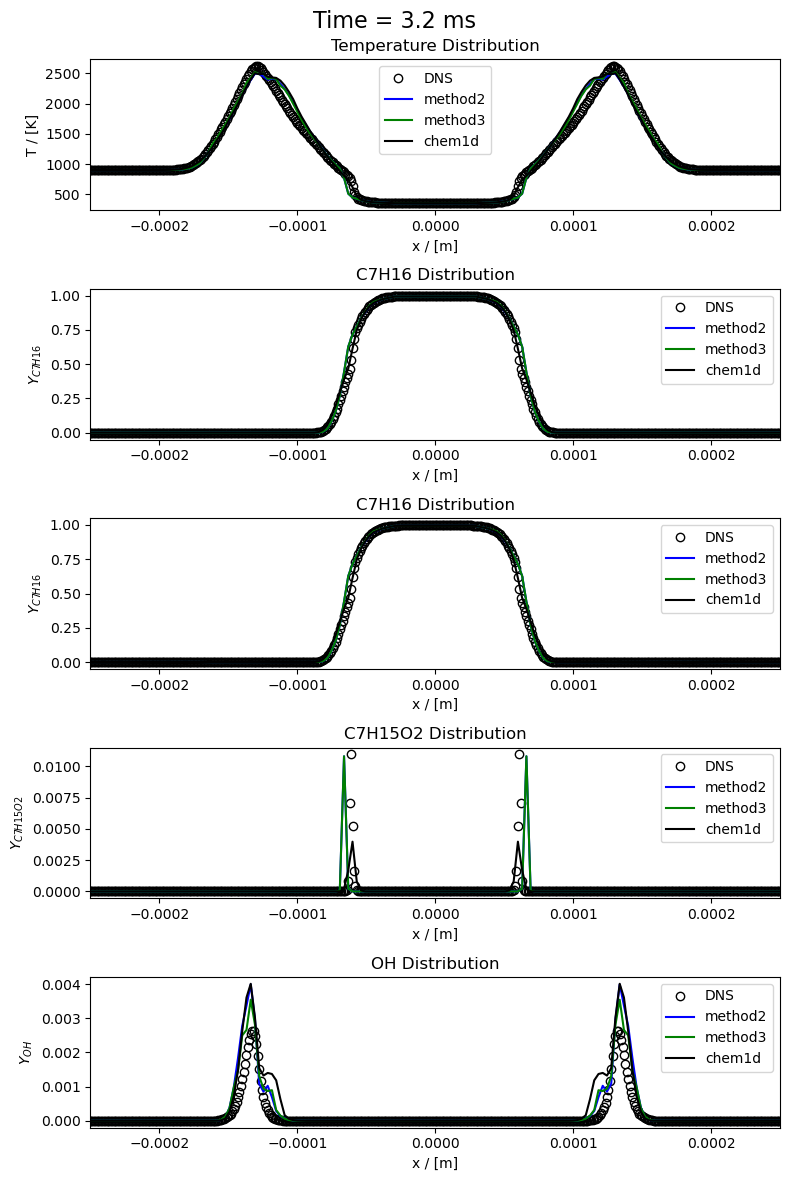

In [5]:
t = 0.0032
DNSCase = oneDCaseReader("../Cases/nhep1d/dnsStandard/")
Zgrid = np.linspace(0,1,301) * np.linspace(0,1,301)
Cgrid = np.linspace(0,1,501)
x_1000 = np.linspace(-0.000512,0.000512,1000)
x_5000 = np.linspace(-0.000512,0.000512,5000)

Z     = DNSCase.readData(t,"Z")
PV    = DNSCase.readData(t,"PV")
C7H16 = DNSCase.readData(t,"C7H16")
NH3   = DNSCase.readData(t,"NH3")
T     = DNSCase.readData(t,"T")
RO2   = DNSCase.readData(t,"C7H15O2")
OH    = DNSCase.readData(t,"OH")
#HRR   = DNSCase.readData(t,"Qdot")
SourcePV = DNSCase.readData(t, "SourcePV")
kappa = DNSCase.readData(t,"thermo:kappa")
mu    = DNSCase.readData(t,"thermo:mu")
psi   = DNSCase.readData(t,"thermo:psi")



c1dLookup = lookup("./table_c1d/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","HRR","SourcePV"])
m2Lookup = lookup("./table_m2a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot","SourcePV"])
m3Lookup = lookup("./table_m3a5000/",["Z", "scaledPV"], ["T","OH","C7H16","T","C7H15O2","OH","Qdot","SourcePV"])

import matplotlib.pyplot as plt

plt.figure(figsize = (8,12))
plt.subplot(511)
# Data points
plt.plot(x_1000, T, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "T")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "T")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "T")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel('T / [K]')
plt.xlim([-0.00025, 0.00025])
plt.title('Temperature Distribution')
plt.legend()

plt.subplot(512)
# Data points
plt.plot(x_1000, C7H16, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{C7H16}$')
plt.xlim([-0.00025, 0.00025])
plt.title('C7H16 Distribution')
plt.legend()

plt.subplot(513)
# Data points
plt.plot(x_1000, C7H16, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "C7H16")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")

# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{C7H16}$')
plt.xlim([-0.00025, 0.00025])
plt.title('C7H16 Distribution')
plt.legend()


plt.subplot(514)
# Data points
plt.plot(x_1000, RO2, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "C7H15O2")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "C7H15O2")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "C7H15O2")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")


# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{C7H15O2}$')
plt.xlim([-0.00025, 0.00025])
plt.title('C7H15O2 Distribution')
plt.legend()


plt.subplot(515)
# Data points
plt.plot(x_1000, OH, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6, label="DNS")
plt.plot(x_1000[::3], m2Lookup.lookupList(Z, PV, "OH")[0][::3], '-', color='blue',markerfacecolor='none', label="method2")
plt.plot(x_1000[::3], m3Lookup.lookupList(Z, PV, "OH")[0][::3], '-', color='green',markerfacecolor='none', label="method3")
plt.plot(x_1000[::3], c1dLookup.lookupList(Z, PV, "OH")[0][::3], '-', color='black',markerfacecolor='none', label="chem1d")


# Customize the plot
plt.xlabel('x / [m]')
plt.ylabel(r'$Y_{OH}$')
plt.xlim([-0.00025, 0.00025])
plt.title('OH Distribution')
plt.legend()

plt.suptitle("Time = {} ms".format(t*1000), fontsize = 16)
plt.tight_layout()

##plt.savefig("time" + str(t*1000) + ".png",dpi = 100)

In [ ]:
""